In [1]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [5]:
df = pd.read_csv('C:/Users/Admin/Downloads/spotify_iitd1.csv')

In [7]:
df.head() #df.head() method in Pandas is used to display the first few rows of a DataFrame

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [9]:
df.shape

(114000, 20)

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [15]:
df.isnull().sum() #df.isnull().sum() in pandas is used to count the number of missing (null or NaN) values in each column of a DataFrame
# artists, album_name and track_name needs to be looked at

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [17]:
df.describe() #df.describe() method in pandas provides a summary of descriptive statistics for a DataFrame.


popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  114000.000000   114000.000000  
mean      122.147837        3.904035  
std        29.978197        0.432621  
min         0.000000        0.000000  
25%        99.218750        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

In [19]:
df['time_signature'].describe()

count    114000.000000
mean          3.904035
std           0.432621
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: time_signature, dtype: float64

In [21]:
# when the quartiles in df.describe() are identical, it highlights a strong clustering of data points around that specific value, indicating a lack of dispersion in the lower and middle ranges of the data.
df = df.drop(axis=1, labels='time_signature')


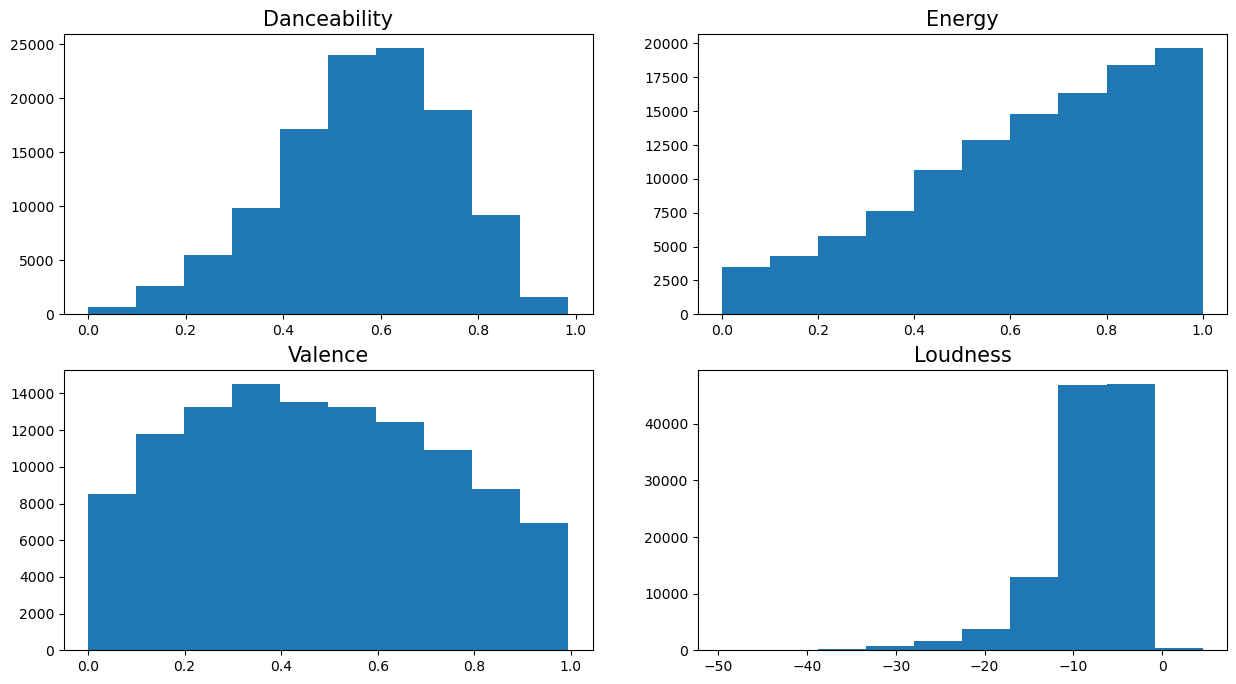

In [41]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [43]:
df.describe()


popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  
count  114000.000000  
mean      122.147837  
std        29.978197  
min         0.000000  
25%        99.218750  
50%       122.017000  
75%       140.071000  
max       243.372000

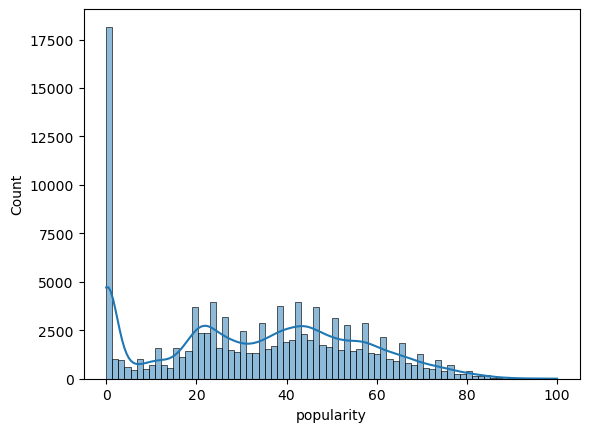


 0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: popularity, Length: 101, dtype: int64


In [51]:
# Distribution plot of song_popularity (target)
sns.histplot(df['popularity'], kde=True)
plt.show()

# The distribution of song popularity needs to be validated.

print("\n", df['popularity'].value_counts())

In [55]:
df["track_genre"].value_counts()



acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: track_genre, Length: 114, dtype: int64

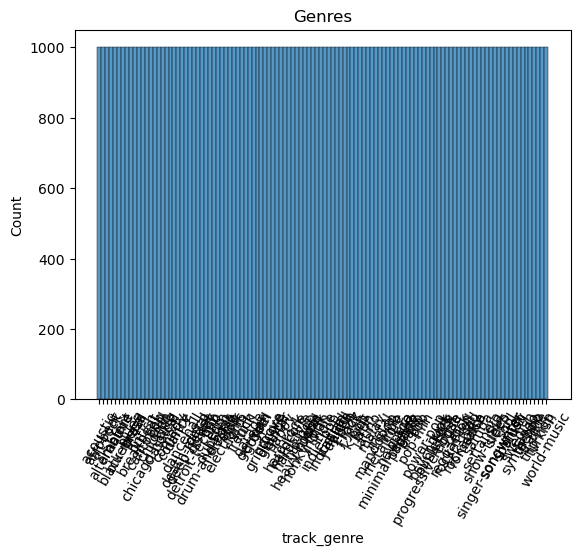

In [59]:
ax = sns.histplot(df["track_genre"])
_ = plt.xticks(rotation=60)
_ = plt.title("Genres")

C:\Users\Admin\AppData\Local\Temp\ipykernel_9468\809261920.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


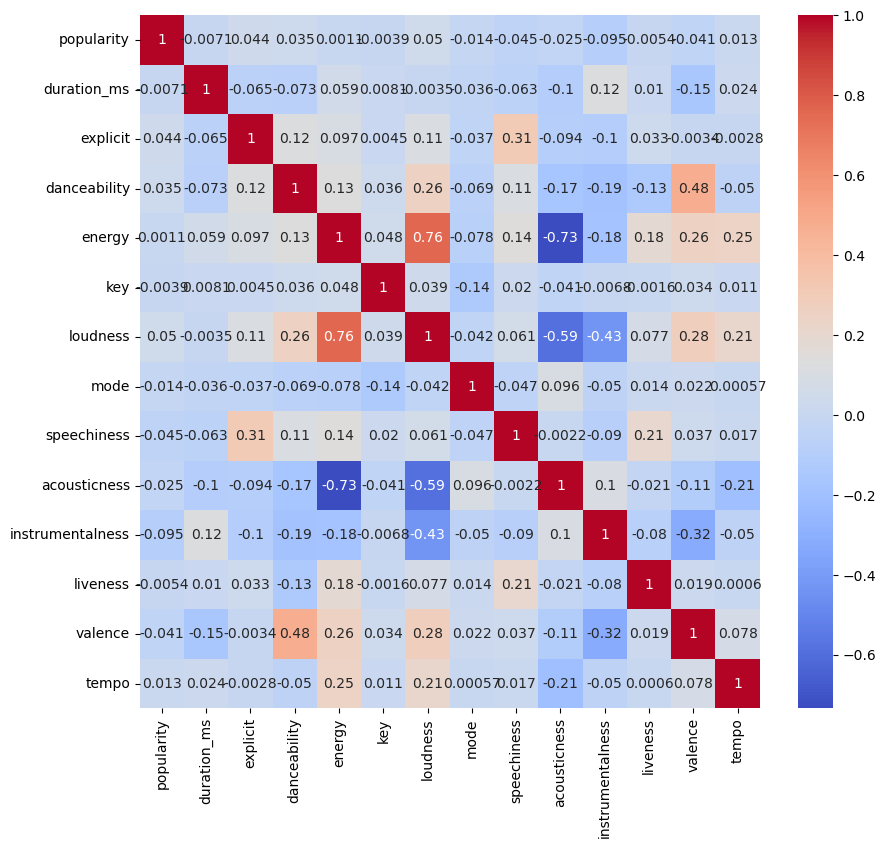

In [61]:
plt.subplots(figsize=(10,9))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [65]:
x = df.loc[:,:"tempo"]
y = df["track_genre"]


Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

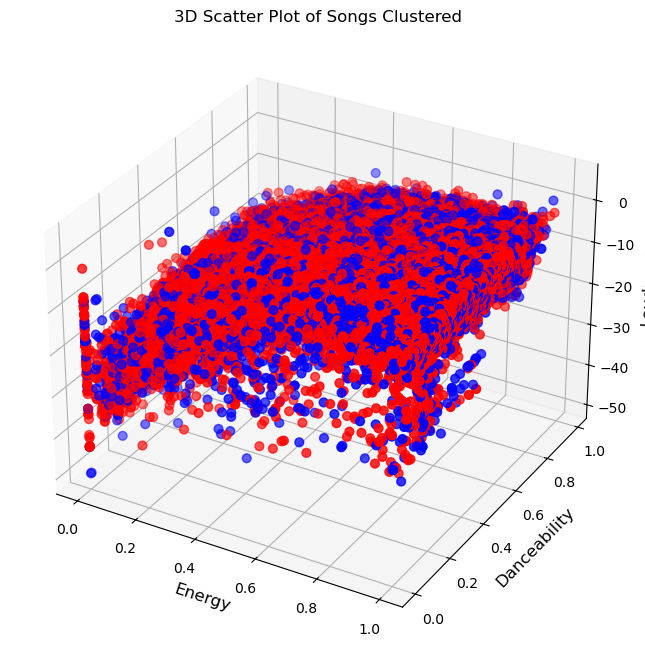

In [84]:
col_features = df.columns[6:13]
X = MinMaxScaler().fit_transform(df[col_features])
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)
df['kmeans'] = kmeans.labels_
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

In [80]:
df.groupby(['kmeans']).mean()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9468\1888085166.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['kmeans']).mean()


popularity    duration_ms  explicit  danceability    energy       key  \
kmeans                                                                          
0        33.650645  233088.953242  0.099301      0.582732  0.667524  5.950870   
1        33.004251  225152.667079  0.077654      0.557743  0.626522  4.944318   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
kmeans                                                                          
0      -7.980380   0.0     0.091177      0.272769          0.176559  0.210015   
1      -8.417333   1.0     0.080943      0.338867          0.144390  0.215564   

         valence       tempo  
kmeans                        
0       0.466520  122.125351  
1       0.478359  122.160621

In [86]:
cluster_0 = df[df['kmeans']==0]
cluster_1  = df[df['kmeans']==1]

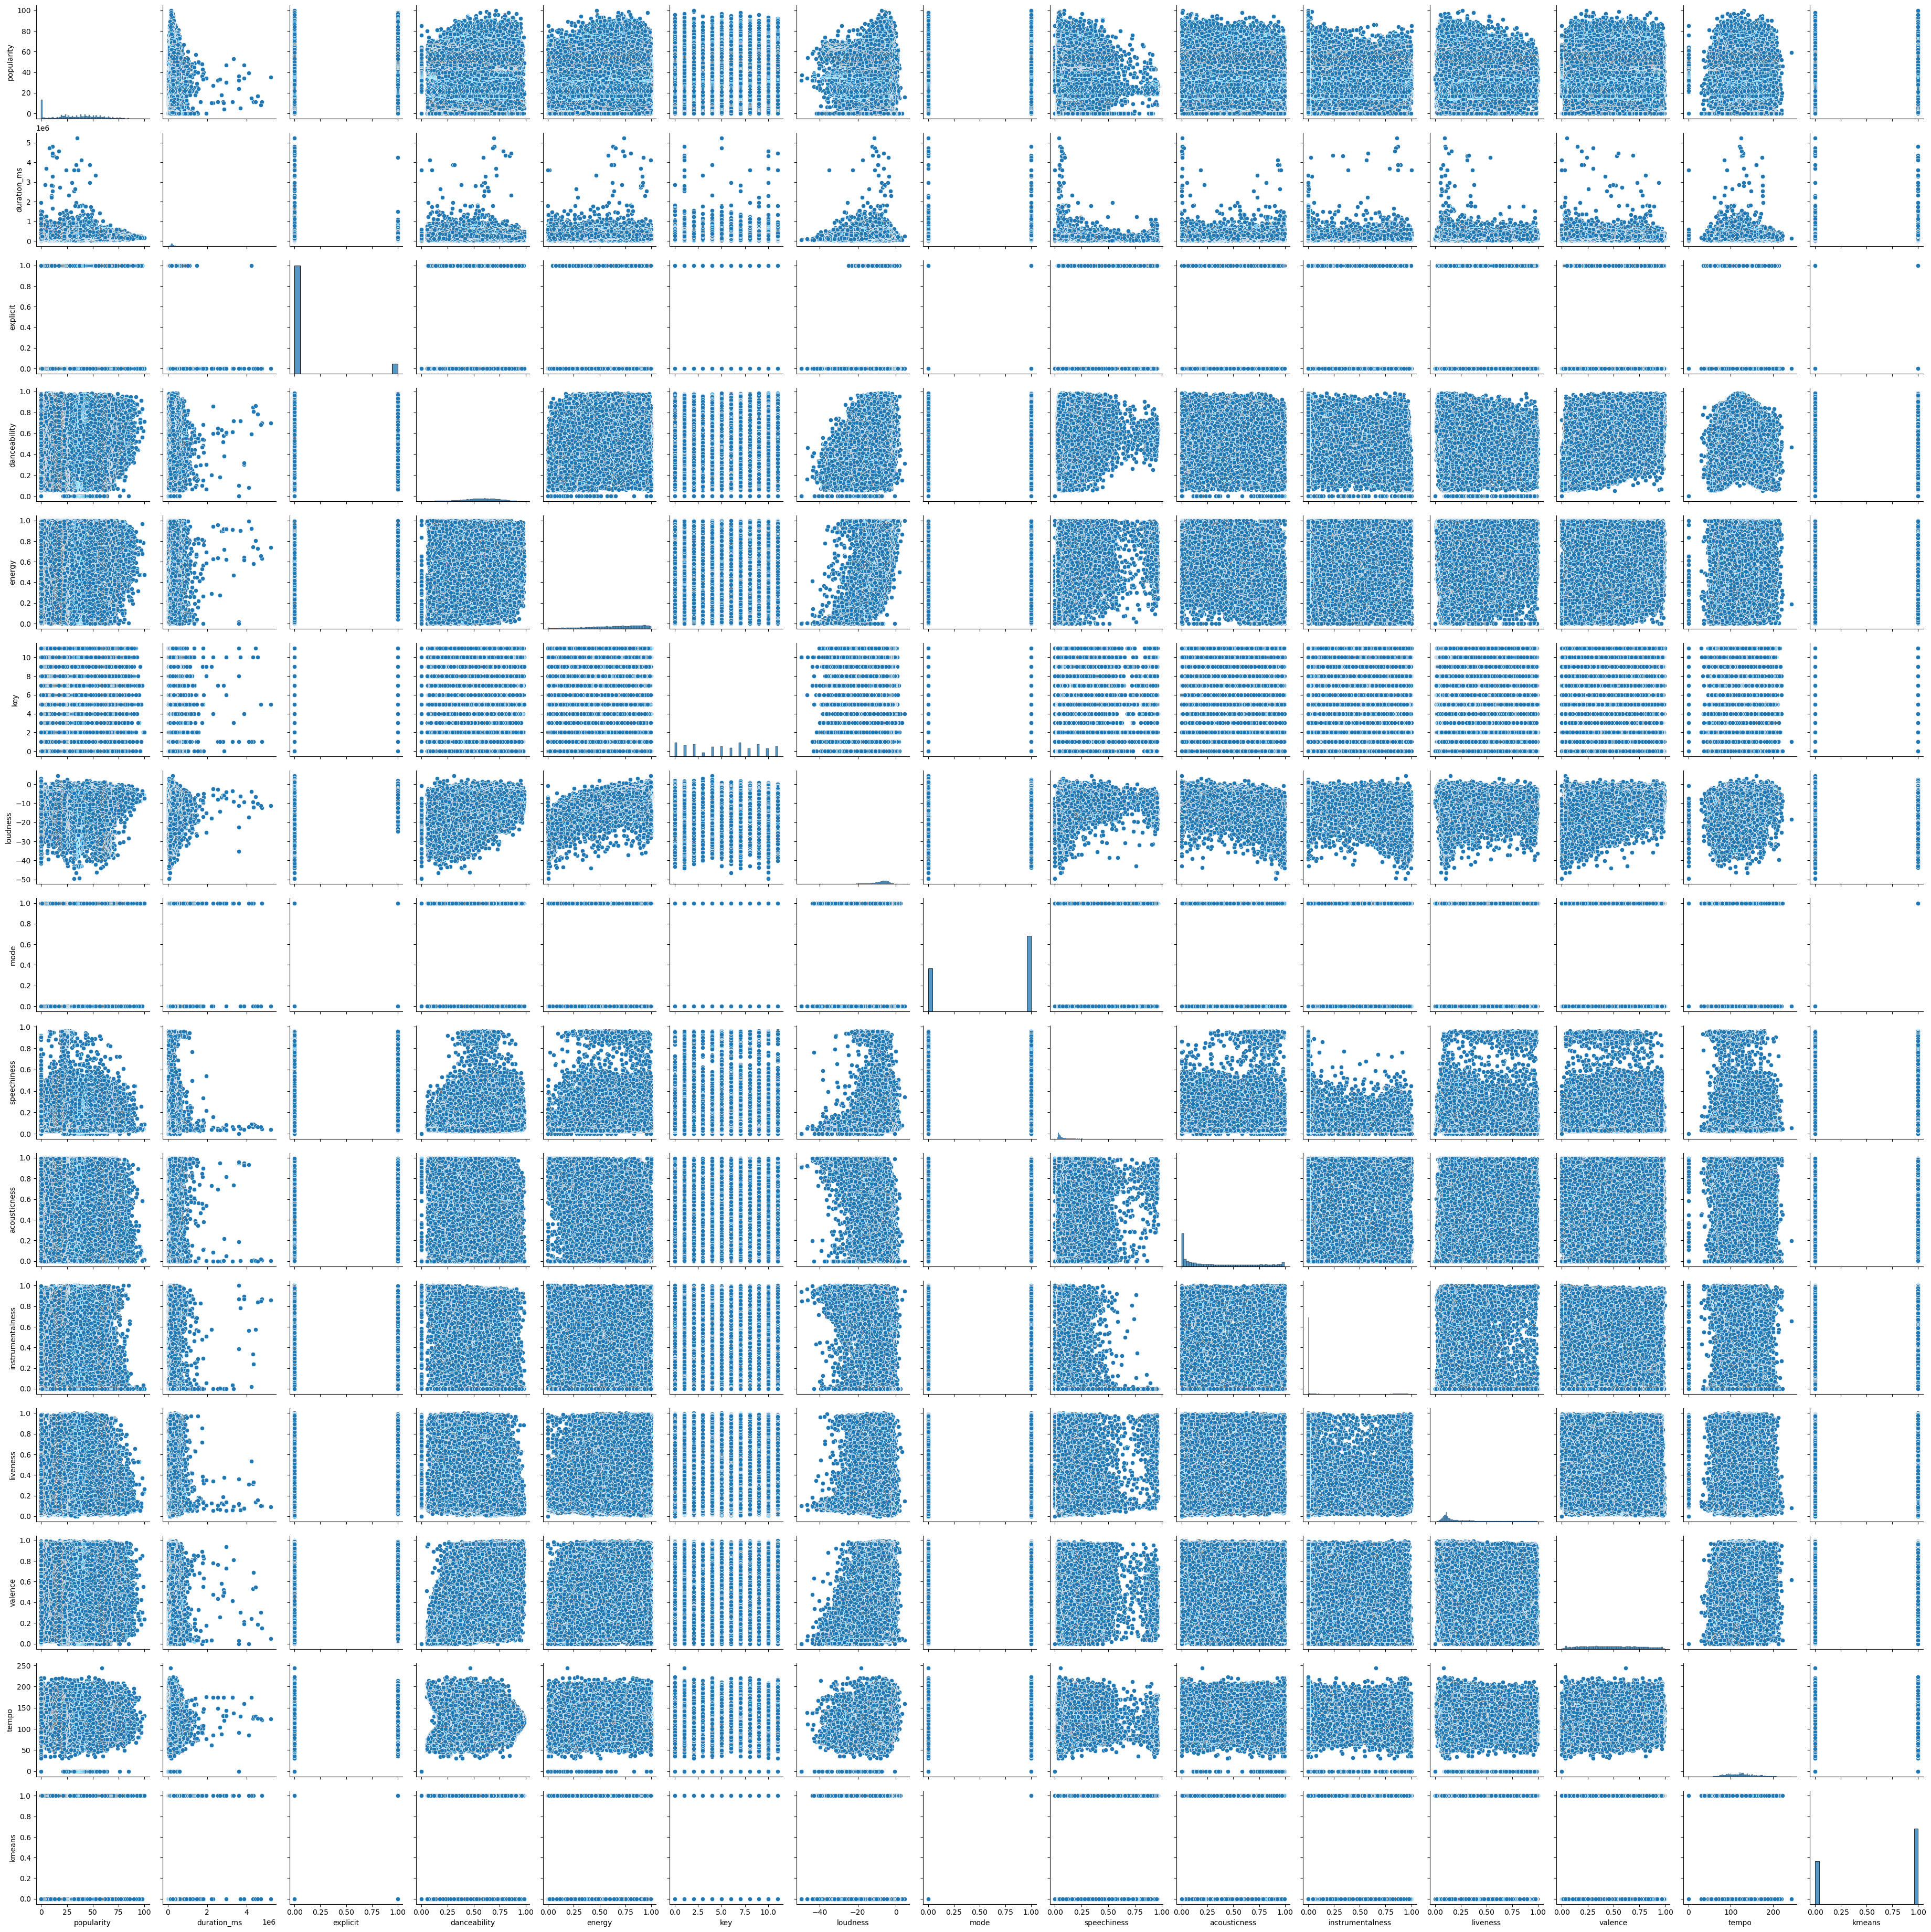

In [91]:
sns.pairplot(df)
plt.show()

In [95]:
# Calculate pearson coefficient to check for linearity between pairs of features
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9468\1199577506.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000    -0.007101  0.044082      0.035448  0.001056   
duration_ms        -0.007101     1.000000 -0.065263     -0.073426  0.058523   
explicit            0.044082    -0.065263  1.000000      0.122507  0.096955   
danceability        0.035448    -0.073426  0.122507      1.000000  0.134325   
energy              0.001056     0.058523  0.096955      0.134325  1.000000   
key                -0.003853     0.008114  0.004484      0.036469  0.048006   
loudness            0.050423    -0.003470  0.108588      0.259077  0.761690   
mode               -0.013931    -0.035556 -0.037212     -0.069219 -0.078362   
speechiness        -0.044927    -0.062600  0.307952      0.108626  0.142509   
acousticness       -0.025472    -0.103788 -0.094403     -0.171533 -0.733906   
instrumentalness   -0.095139     0.124371 -0.103404     -0.185606 -0.181879   
liveness           -0.005387     0.010321  0.032549     -0.131617  0.184796   
valence            -0.040534    -0.154479 -0.003381      0.477341  0.258934   
tempo               0.013205     0.024346 -0.002816     -0.050450  0.247851   
kmeans             -0.013931    -0.035556 -0.037212     -0.069219 -0.078362   

                       key  loudness      mode  speechiness  acousticness  \
popularity       -0.003853  0.050423 -0.013931    -0.044927     -0.025472   
duration_ms       0.008114 -0.003470 -0.035556    -0.062600     -0.103788   
explicit          0.004484  0.108588 -0.037212     0.307952     -0.094403   
danceability      0.036469  0.259077 -0.069219     0.108626     -0.171533   
energy            0.048006  0.761690 -0.078362     0.142509     -0.733906   
key               1.000000  0.038590 -0.135916     0.020418     -0.040937   
loudness          0.038590  1.000000 -0.041764     0.060826     -0.589803   
mode             -0.135916 -0.041764  1.000000    -0.046532      0.095553   
speechiness       0.020418  0.060826 -0.046532     1.000000     -0.002186   
acousticness     -0.040937 -0.589803  0.095553    -0.002186      1.000000   
instrumentalness -0.006823 -0.433477 -0.049955    -0.089616      0.104027   
liveness         -0.001600  0.076899  0.014012     0.205219     -0.020700   
valence           0.034103  0.279848  0.021953     0.036635     -0.107070   
tempo             0.010917  0.212446  0.000566     0.017273     -0.208224   
kmeans           -0.135916 -0.041764  1.000000    -0.046532      0.095553   

                  instrumentalness  liveness   valence     tempo    kmeans  
popularity               -0.095139 -0.005387 -0.040534  0.013205 -0.013931  
duration_ms               0.124371  0.010321 -0.154479  0.024346 -0.035556  
explicit                 -0.103404  0.032549 -0.003381 -0.002816 -0.037212  
danceability             -0.185606 -0.131617  0.477341 -0.050450 -0.069219  
energy                   -0.181879  0.184796  0.258934  0.247851 -0.078362  
key                      -0.006823 -0.001600  0.034103  0.010917 -0.135916  
loudness                 -0.433477  0.076899  0.279848  0.212446 -0.041764  
mode                     -0.049955  0.014012  0.021953  0.000566  1.000000  
speechiness              -0.089616  0.205219  0.036635  0.017273 -0.046532  
acousticness              0.104027 -0.020700 -0.107070 -0.208224  0.095553  
instrumentalness          1.000000 -0.079893 -0.324312 -0.050330 -0.049955  
liveness                 -0.079893  1.000000  0.019086  0.000600  0.014012  
valence                  -0.324312  0.019086  1.000000  0.078273  0.021953  
tempo                    -0.050330  0.000600  0.078273  1.000000  0.000566  
kmeans                   -0.049955  0.014012  0.021953  0.000566  1.000000

C:\Users\Admin\AppData\Local\Temp\ipykernel_9468\804347266.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr())
C:\Users\Admin\AppData\Local\Temp\ipykernel_9468\804347266.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,linewidths=0.4,ax=ax,cmap="coolwarm",mask=mask)


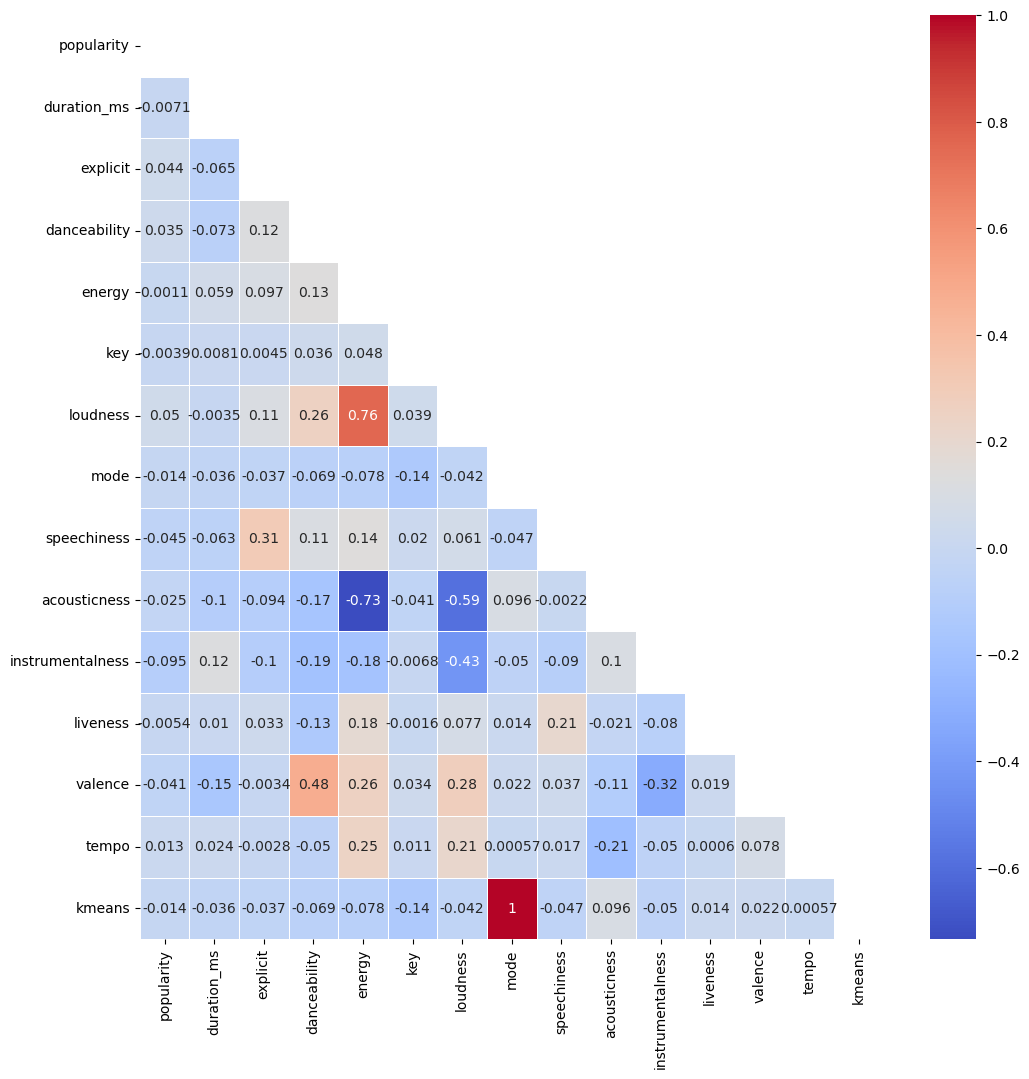

In [101]:
# Plot song_data.corr() into a heatmap to easily identify pairs with stronger correlations
#Analysis of the pair plot & heat map for correlations

f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), annot=True,linewidths=0.4,ax=ax,cmap="coolwarm",mask=mask)
plt.show() 

In [137]:
#Feature Engineering - Top Artists / Albumns ¶
# Filter based on songs that are "Popular" or "Somewhat Popular"
song_info_data_popular = df[df["popularity"] >= 70]

In [139]:
print("Number of Unique artists:")
print(song_info_data_popular['artists'].nunique())

print("\nNumber of unique albums:")
print(song_info_data_popular['album_name'].nunique())


Number of Unique artists:
2

Number of unique albums:
2447


In [141]:
# Top 200 Artists among Popular / Somewhat Popular songs
top_200_artists = song_info_data_popular['artists'].value_counts().head(200)
print(top_200_artists.head(10), "\n")

# If among the top 200 artists, set value to 1. Otherwise, set to 0.
df["artists"] = [ 1 if (i in top_200_artists) else 0 for i in df.artists ]
df["artists"].value_counts()

0    3181
1    2291
Name: artists, dtype: int64 



1    114000
Name: artists, dtype: int64

In [143]:
X= df.loc[:,df.columns !="popularity"] # all the features accept DV
y = df["popularity"] # the DV

In [149]:
# separate the data to training and testing
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)
# save as np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) 
y_test = np.array(y_test)
#The y vector contains the songs’ “popularity” score

In [159]:
# create a linear regression, random forest & decision tree object
model_regression = linear_model.LinearRegression()
model_random_forest = RandomForestRegressor()
model_decision_tree = DecisionTreeRegressor()